<a href="https://www.kaggle.com/code/anovayana/online-retail-ii-uci-analytics?scriptVersionId=101245814" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Online Retail II UCI

## Loading the required libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
data = pd.read_csv('../input/online-retail-ii-uci/online_retail_II.csv', on_bad_lines = 'skip', parse_dates=['InvoiceDate'])

## Attribute Information:
* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal. The name of the country where a customer resides.

## Checking the data

In [3]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


Four of the variables are 'object' while three are numerical, and one is dt.

In [5]:
data.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371,1067371,1062989,1.067371e+06,1067371,1.067371e+06,824364.000000,1067371
unique,53628,5305,5698,NaN,47635,NaN,NaN,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,1350,5829,5918,NaN,1350,NaN,NaN,981330
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.938898e+00,NaN,4.649388e+00,15324.638504,NaN
std,NaN,NaN,NaN,1.727058e+02,NaN,1.235531e+02,1697.464450,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,-5.359436e+04,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13975.000000,NaN


From the output, we can infer that the median (50%) Price is 2,1 and the median Quantity is 3, when the average Price is 4.65 and the average Quantity is 9.94. There is a difference between the mean and the median values of these variables, which is because of the distribution of the data. 
Also, we can infer that the min Price and Quantity are negative. 

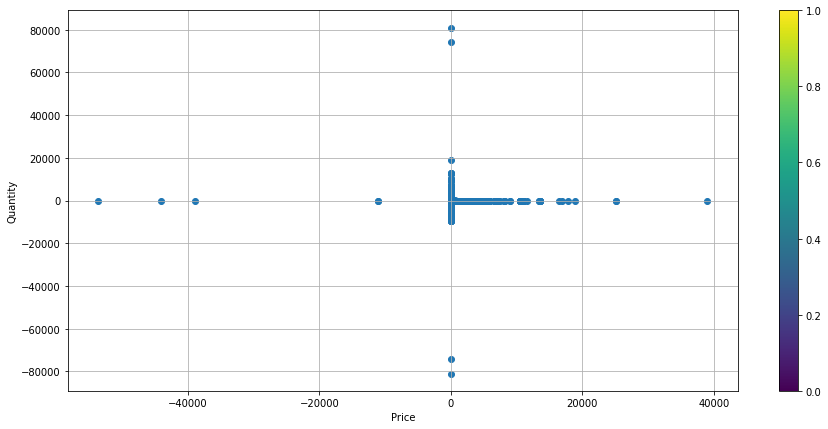

In [6]:
plt.figure(figsize=(15,7))
plt.scatter(data['Price'], data['Quantity'])
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.grid(True)
plt.colorbar()

<AxesSubplot:xlabel='Price', ylabel='Density'>

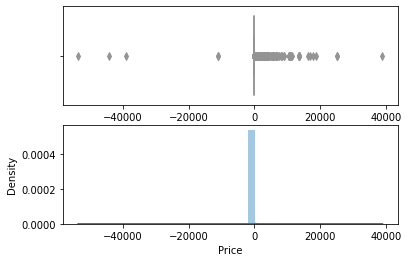

In [7]:
fig, ax = plt.subplots(2, 1)
sns.boxplot(data['Price'], palette='PRGn', ax = ax[0])
sns.distplot(data['Price'], ax = ax[1])

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

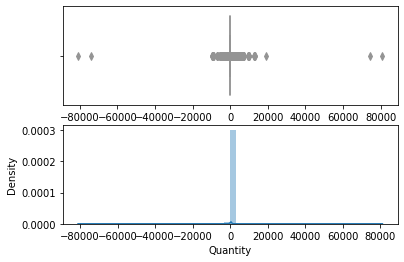

In [8]:
fig, ax = plt.subplots(2, 1)
sns.boxplot(data['Quantity'], palette='PRGn', ax = ax[0])
sns.distplot(data['Quantity'], ax = ax[1])

## Data cleaning

In [9]:
data = data[(data['Price']>0) & (data['Price'] < 20000)]
data = data[(data['Quantity']>0) & (data['Quantity']< 20000)]

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

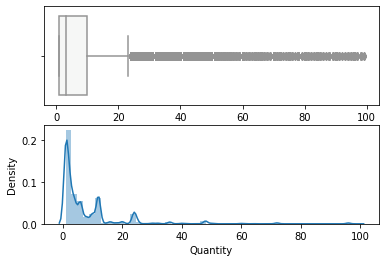

In [10]:
fig, ax = plt.subplots(2, 1)
sns.boxplot(data['Quantity'][data['Quantity']<100], palette='PRGn', ax = ax[0])
sns.distplot(data['Quantity'][data['Quantity']<100], ax = ax[1])

<AxesSubplot:xlabel='Price', ylabel='Density'>

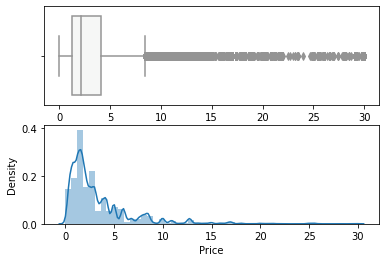

In [11]:
fig, ax = plt.subplots(2, 1)
sns.boxplot(data['Price'][data['Price']<30], palette='PRGn', ax = ax[0])
sns.distplot(data['Price'][data['Price']<30], ax = ax[1])

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

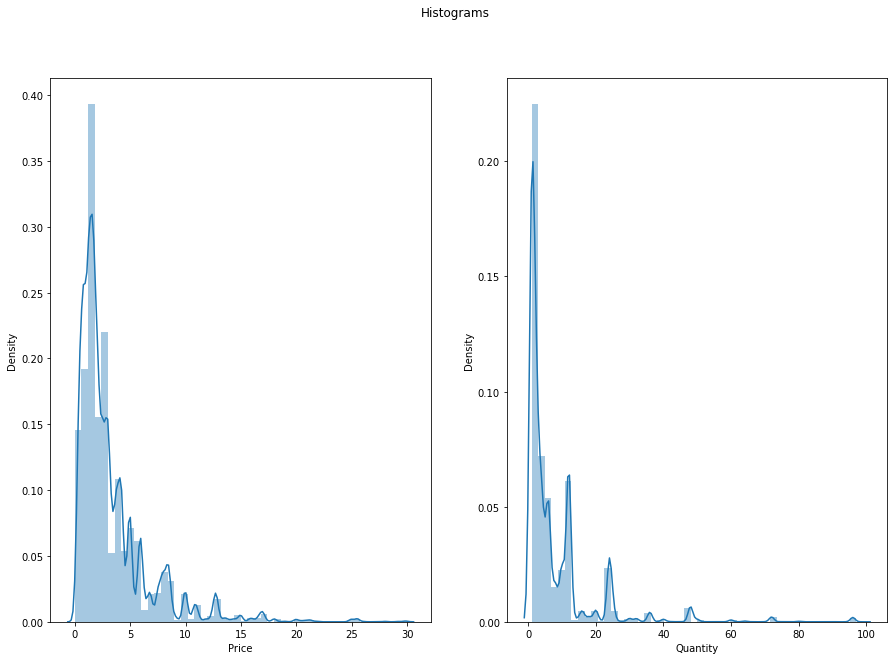

In [12]:
fig,ax = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Histograms')
sns.distplot(data['Price'][data['Price']<30], ax=ax[0])
sns.distplot(data['Quantity'][data['Quantity']<100], ax=ax[1])

In [13]:
data['Total'] = data['Quantity'] * data['Price']


In [14]:
#Customers with Max Total Purchase Amount
data.groupby(['Customer ID', 'Country'], as_index=False)['Total'].agg('sum').sort_values('Total', ascending=False).head()

,Customer ID,Country,Total
5705,18102.0,United Kingdom,608821.65
2290,14646.0,Netherlands,528602.52
1802,14156.0,EIRE,313946.37
2551,14911.0,EIRE,295972.63
5063,17450.0,United Kingdom,246973.09


In [15]:
#Countries With Max Total Purchase Amount
data.groupby(['Country'], as_index=False)['Total'].agg('sum').sort_values('Total', ascending=False).head()

,Country,Total
40,United Kingdom,1.760059e+07
11,EIRE,6.644318e+05
26,Netherlands,5.542323e+05
15,Germany,4.312625e+05
14,France,3.569446e+05


# RFM

In [16]:
data = data.groupby('Customer ID', as_index=False).agg({'Total':'mean', 'InvoiceDate':'max', 'Invoice':'nunique'})

In [17]:
obs_date = (max(data['InvoiceDate']) + timedelta(days=1))
data['days_since_lats_purch'] = data['InvoiceDate'].apply(lambda x: obs_date - x)
data['days_since_lats_purch'] = data['days_since_lats_purch'].dt.days.astype(int)

<AxesSubplot:xlabel='days_since_lats_purch', ylabel='Density'>

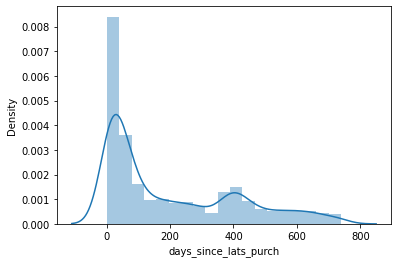

In [18]:
sns.distplot(data['days_since_lats_purch'])

# # recent

<AxesSubplot:xlabel='recent', ylabel='count'>

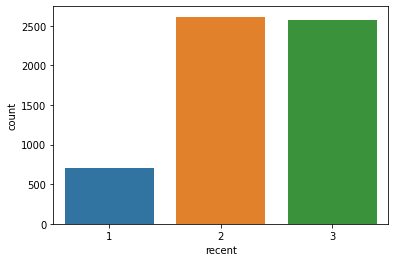

In [19]:
def recent_score(r):
    if r <= 70:
        return 3
    elif r > 70 and r <= 500:
        return 2
    else:
        return 1

data['recent'] = data['days_since_lats_purch'].apply(recent_score)
sns.countplot(data['recent'])

<AxesSubplot:xlabel='Invoice', ylabel='Density'>

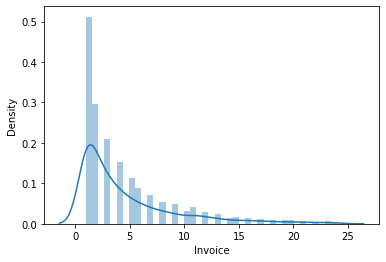

In [20]:
sns.distplot(data[data['Invoice']<25]['Invoice'])

# # frequency

<AxesSubplot:xlabel='frequency', ylabel='count'>

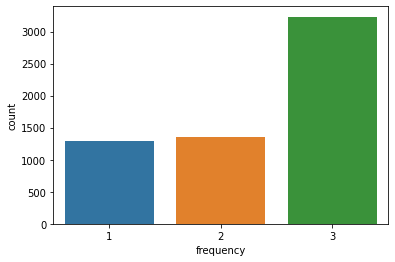

In [21]:
def frequency_score(r):
    if r <= 3:
        return 3
    elif r > 3 and r <= 7:
        return 2
    else:
        return 1

data['frequency'] = data['Invoice'].apply(frequency_score)
sns.countplot(data['frequency'])

<AxesSubplot:xlabel='Total', ylabel='Density'>

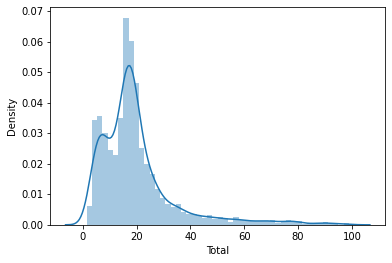

In [22]:
sns.distplot(data[data['Total']<100]['Total'])

# # monetary

<AxesSubplot:xlabel='monetary', ylabel='count'>

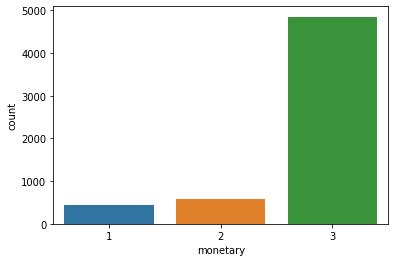

In [23]:
def monetary_score(r):
    if r <= 30:
        return 3
    elif r > 30 and r <= 60:
        return 2
    else:
        return 1

data['monetary'] = data['Total'].apply(monetary_score)
sns.countplot(data['monetary'])

In [24]:
data['rfm'] = data.apply(lambda x: str(x['recent']) + str(x['frequency']) + str(x['monetary']), axis=1)
data.head()

,Customer ID,Total,InvoiceDate,Invoice,days_since_lats_purch,recent,frequency,monetary,rfm
0,12346.0,11.298788,2010-06-28 13:53:00,11,529,1,1,3,113
1,12347.0,22.266087,2011-12-07 15:52:00,8,2,3,1,3,313
2,12348.0,39.596078,2011-09-25 13:13:00,5,75,2,2,2,222
3,12349.0,25.306800,2011-11-21 09:51:00,4,19,3,2,3,323
4,12350.0,19.670588,2011-02-02 16:01:00,1,310,2,3,3,233


<AxesSubplot:xlabel='count', ylabel='rfm'>

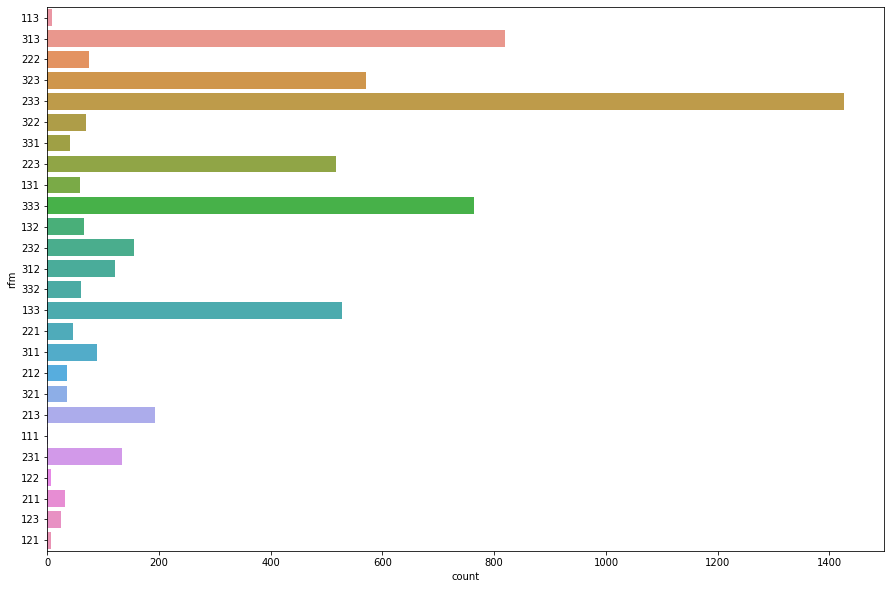

In [25]:
plt.figure(figsize=(15, 10))
sns.countplot(y=data['rfm'])